In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Kmeans Clustering

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [8]:
df1 = pd.read_excel("data_students.xls", sheet_name="Training_Data")
df1.head(2)

,STG,SCG,STR,LPR,PEG,Unnamed: 5,Unnamed: 6,Attribute Information:
0,0.08,0.08,0.10,0.24,0.90,NaN,NaN,STG (The degree of study time for goal object ...
1,0.06,0.06,0.05,0.25,0.33,NaN,NaN,SCG (The degree of repetition number of user f...


/tmp/ipykernel_15453/3139248142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correMtr=df1.corr()


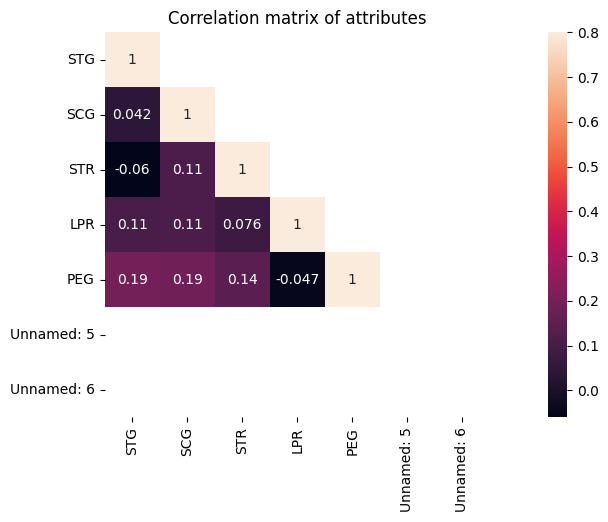

In [10]:
correMtr=df1.corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

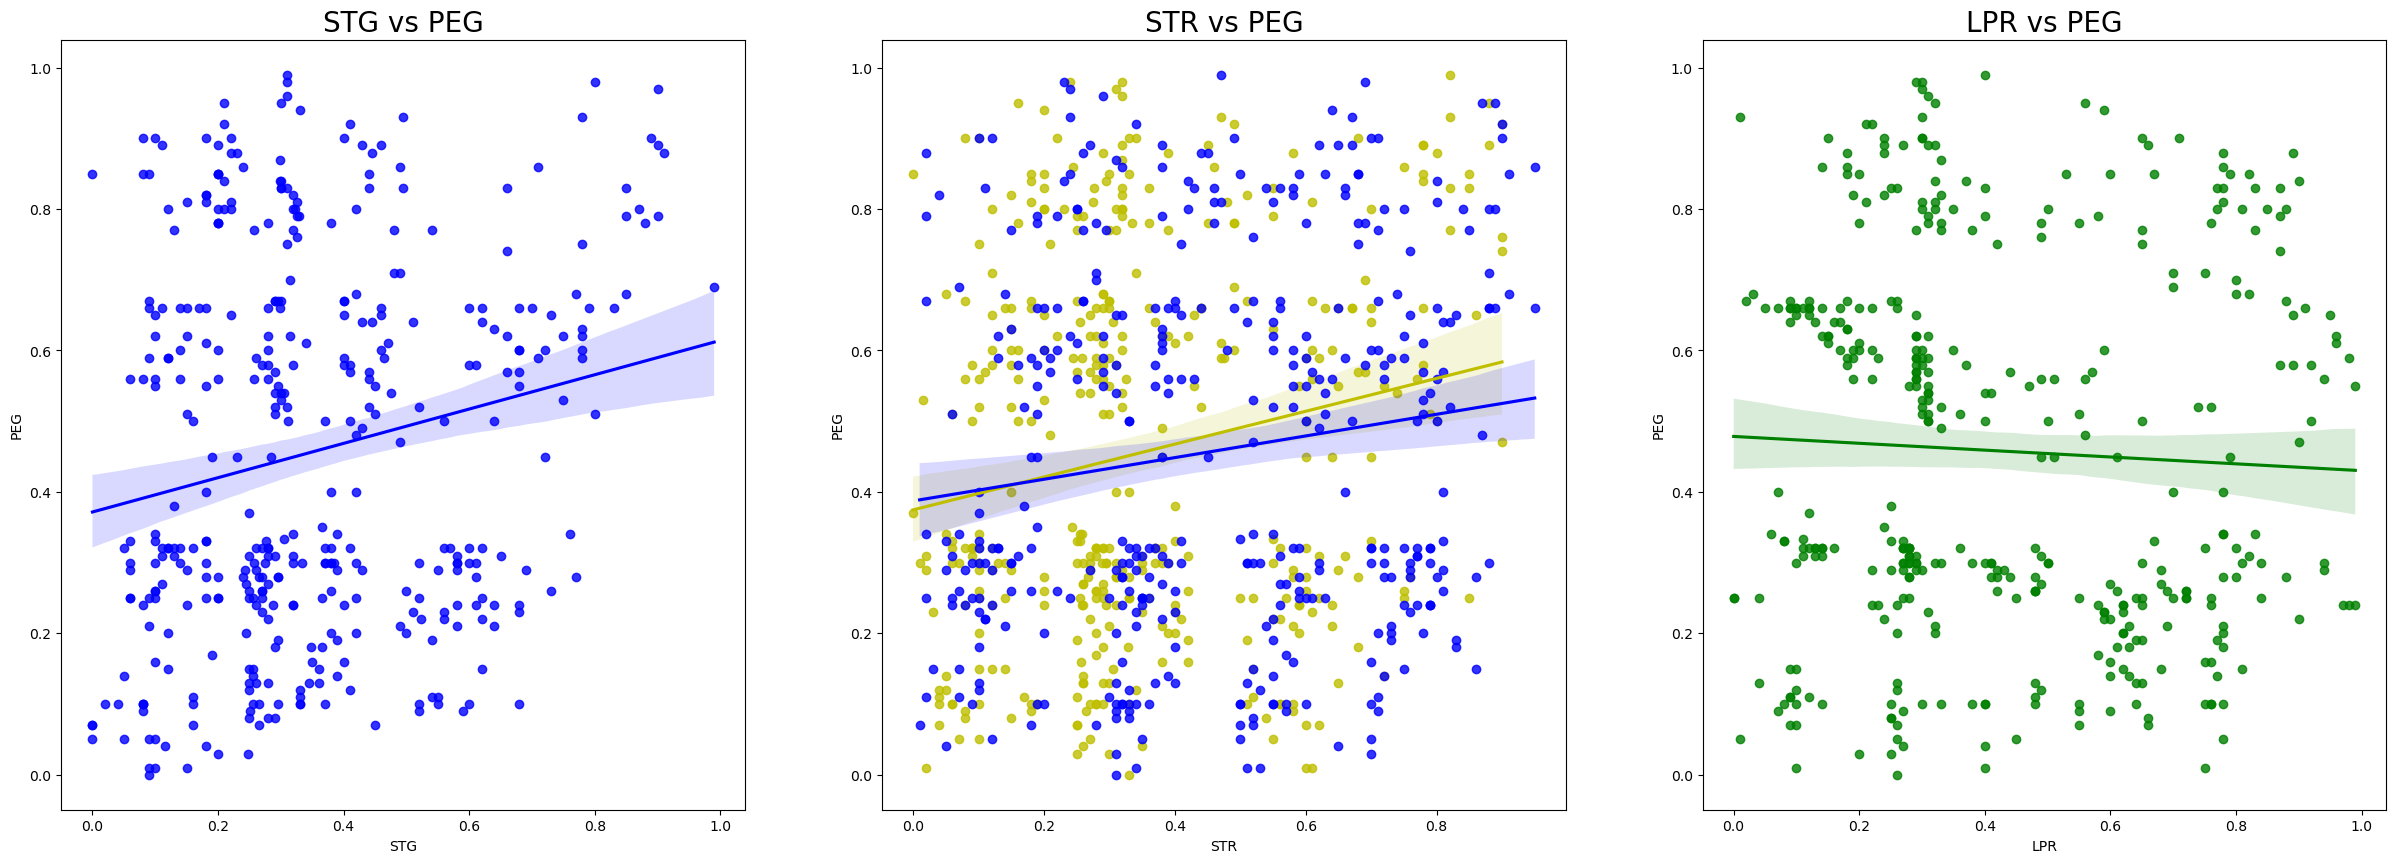

In [298]:
plt.figure(figsize=(30,10))
plt.subplot(1, 3 , 1)
plt.title("STG vs PEG", size=20)
sns.regplot(data=df1, x="STG", y="PEG",color="blue")

# plt.figure(figsize=(30,10))
plt.subplot(1, 3 , 2)
plt.title("SCG vs PEG", size=20)
sns.regplot(data=df1, x="SCG", y="PEG",color="y")

# plt.figure(figsize=(30,10))
plt.subplot(1, 3 , 2)
plt.title("STR vs PEG", size=20)
sns.regplot(data=df1, x="STR", y="PEG",color="b")

# plt.figure(figsize=(30,10))
plt.subplot(1, 3 , 3)
plt.title("LPR vs PEG", size=20)
sns.regplot(data=df1, x="LPR", y="PEG",color="green")
plt.show()

# Keep only the columns containing the data about student's knowledge

In [11]:

grade = df1.iloc[:,:5]
grade.head()

,STG,SCG,STR,LPR,PEG
0,0.08,0.08,0.10,0.24,0.90
1,0.06,0.06,0.05,0.25,0.33
2,0.10,0.10,0.15,0.65,0.30
3,0.08,0.08,0.08,0.98,0.24
4,0.09,0.15,0.40,0.10,0.66


In [12]:
grade.isnull().sum()

STG    0
SCG    0
STR    0
LPR    0
PEG    0
dtype: int64

### Convert to nparray

In [13]:
X1=grade.values

# Using PCA to have only two principle components and make a model with this two PCA features

In [14]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X1)
PC = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
PC.head()

,PC1,PC2
0,0.003175,-0.445385
1,-0.475740,-0.239174
2,-0.362396,0.157624
3,-0.391466,0.462188
4,-0.057723,-0.421509


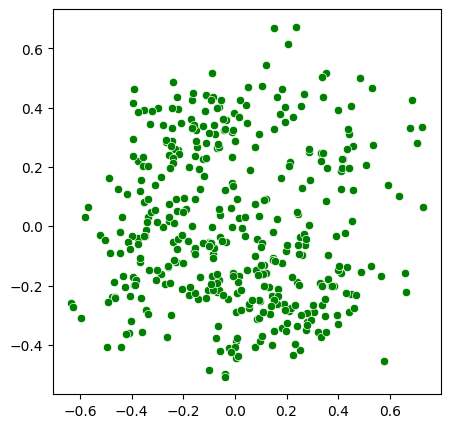

In [15]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=principalComponents[:,0], y=principalComponents[:,1], color="green")
plt.show()

### Change dataframe to nparray

In [16]:
X_PC=PC.values

### Find the best number of clusters for dataset with elbow methode

In [17]:
inertia = []
for cl_num in range(1 , 10):
    km = KMeans(n_clusters = cl_num, max_iter=100, n_init='auto', random_state= 100)
    km.fit(X_PC)
    inertia.append(km.inertia_)

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

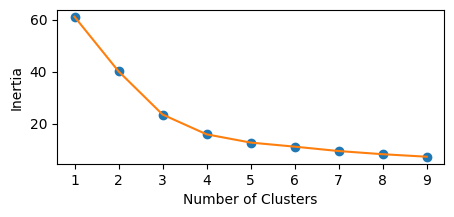

In [18]:
fig = plt.figure(figsize=(5, 2))

plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

# The best number of k clustering according to plot can be 3 or 4

#### if K=3:

In [19]:
k = 3
km_cluster = KMeans(n_clusters = k , n_init = 'auto',max_iter=200, random_state= 120)
km_cluster.fit(X_PC)
labels = km_cluster.labels_
centroids = km_cluster.cluster_centers_

Text(0.5, 1.0, 'Find Unknown groups in students Data')

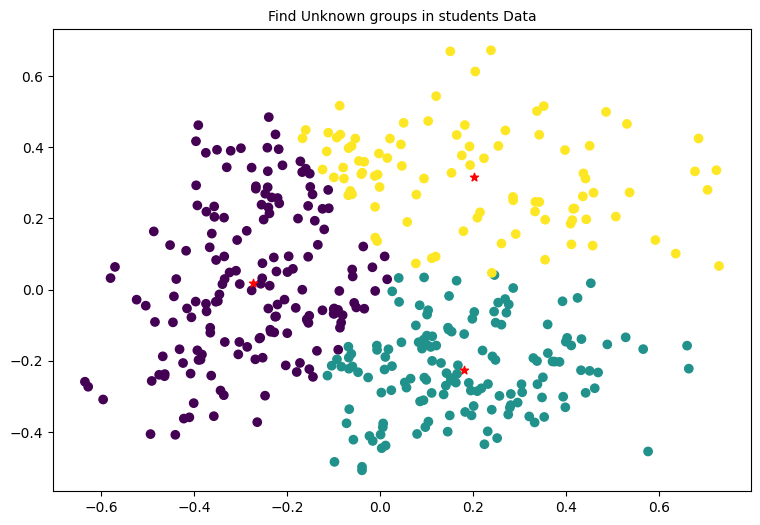

In [20]:
fig = plt.figure(figsize=(9, 6))

plt.scatter(X_PC[:,0], X_PC[:,1], c=labels)
plt.scatter(centroids[:,0] ,centroids[:,1], color='red', marker="*")
plt.title("Find Unknown groups in students Data", fontsize=10)

In [22]:
davies_bouldin_score(X_PC, labels)

0.8368082944737951

### if K=4:

In [23]:
k = 4
km_cluster = KMeans(n_clusters = k , n_init = 'auto',max_iter=200, random_state= 120)
km_cluster.fit(X_PC)
labels_ = km_cluster.labels_
centroids = km_cluster.cluster_centers_

Text(0.5, 1.0, 'Find Unknown groups in students Data')

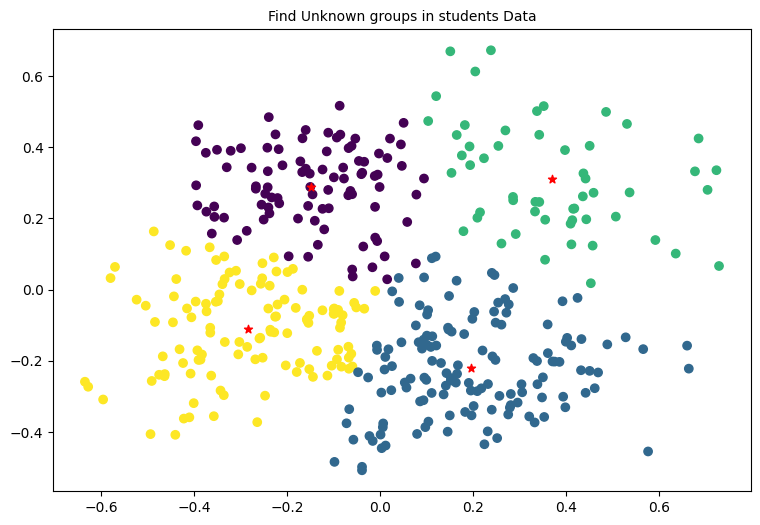

In [24]:
fig = plt.figure(figsize=(9, 6))

plt.scatter(X_PC[:,0], X_PC[:,1], c=labels_)
plt.scatter(centroids[:,0] ,centroids[:,1], color='red', marker="*")
plt.title("Find Unknown groups in students Data", fontsize=10)

In [25]:
davies_bouldin_score(X_PC, labels_)

0.7562697252849215

## Add Clusters column to dataset

In [26]:
PC["clusters"] = km_cluster.fit_predict(PC)

In [27]:
PC.head()

,PC1,PC2,clusters
0,0.003175,-0.445385,1
1,-0.475740,-0.239174,3
2,-0.362396,0.157624,0
3,-0.391466,0.462188,0
4,-0.057723,-0.421509,1


# 2.DBscan

In [36]:
from sklearn.preprocessing import StandardScaler

In [35]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [31]:
DB =df1[['STG' , 'PEG']].values

## try to find the best parameters for DBScan with silhouette score

In [56]:
scaler = StandardScaler()
st = scaler.fit_transform(DB)

for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (4,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(st)
        score = silhouette_score(st, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')
        


eps 0.2
\min samples 4
clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
clusters sizes: [ 47   5 128  24  25  17  44  25   9  33  23   6   5   6   5]
Silhouette Score: 0.22523992317088296

eps 0.2
\min samples 5
clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
clusters sizes: [ 64   5 127  24  25  14  43  25   8  32  19   6   5   5]
Silhouette Score: 0.22177937869772157

eps 0.2
\min samples 6
clusters present: [-1  0  1  2  3  4  5  6  7  8  9]
clusters sizes: [ 82 127  24  25  14  43  25   6  32  18   6]
Silhouette Score: 0.18587936128335

eps 0.2
\min samples 7
clusters present: [-1  0  1  2  3  4  5  6  7  8  9]
clusters sizes: [102 127  22  23  14  43  23  25   9   7   7]
Silhouette Score: 0.09429393179696816

eps 0.2
\min samples 8
clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
clusters sizes: [114  36  21  23   8   6  90  27  16  17   6  21   9   8]
Silhouette Score: 0.12790564345511393

eps 0.3
\min samples 4
clusters present: [-1  0

### Select the parameters that have high silhouette score

In [57]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.3,min_samples=6,metric='euclidean')

In [58]:
model=db.fit(st)

In [59]:
label_D=model.labels_

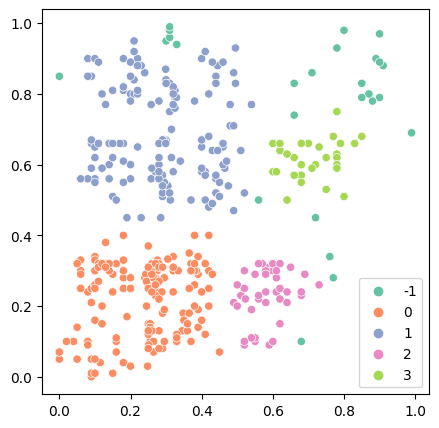

In [60]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=DB[:,0], y=DB[:,1], hue=label_D, palette="Set2")
plt.show()

# 3.Birch

In [46]:
from sklearn.cluster import Birch

In [52]:
brc = Birch(n_clusters=4)

In [53]:
brc.fit(DB)

/home/sara/.local/lib/python3.10/site-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(


Birch(n_clusters=4)

In [54]:
label_D=brc.labels_

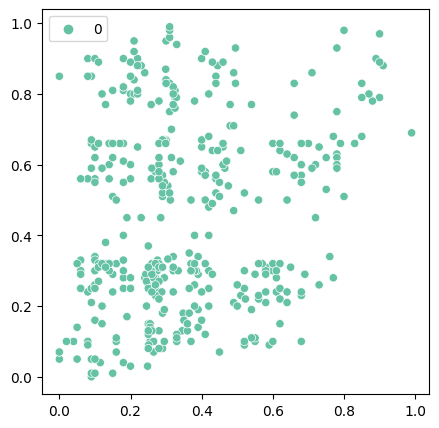

In [55]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=DB[:,0], y=DB[:,1], hue=label_D, palette="Set2")
plt.show()